In [1]:
from hiive.mdptoolbox import example
import mdp
from utils import *

In [2]:
import gym, gym_walk, numpy as np
env = gym.make('WalkFive-v0')
pi = lambda x: np.random.randint(2)

In [3]:
env.observation_space.n

7

In [4]:
P, R = example.openai("WalkFive-v0", True)


[ABCDE]


/opt/homebrew/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(
/opt/homebrew/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


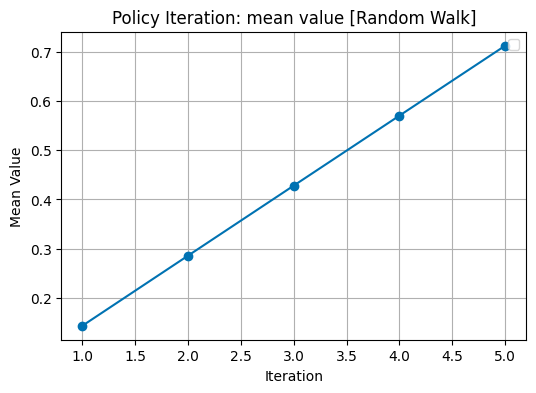

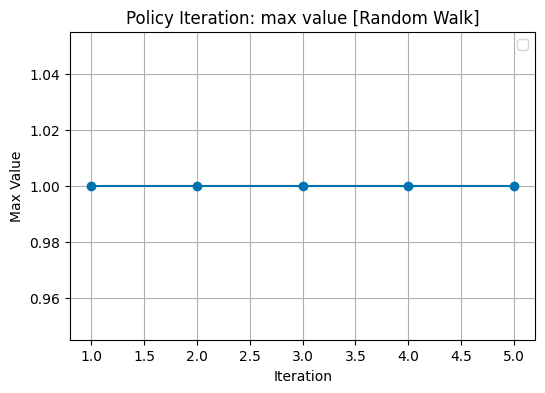

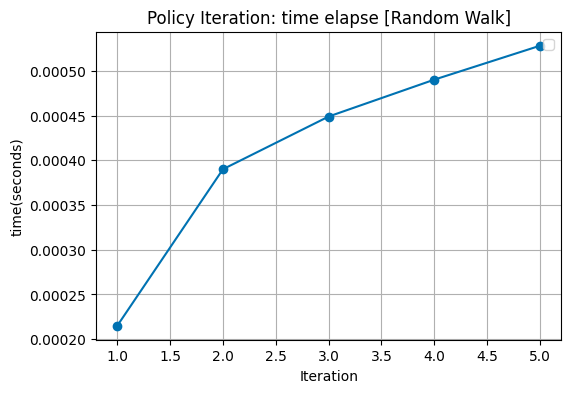

In [5]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
pi = mdp.PolicyIterationModified(**args)
pi.run()
print(pi)
pi_result = record(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_result["Mean V"])
print("max mean v", max(pi_result["Mean V"]))
plot_data(pi_result["Iteration"], pi_result["Mean V"], 
                 "Iteration", "Mean Value", "Policy Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(pi_result["Iteration"], pi_result["Max V"], 
                 "Iteration", "Max Value", "Policy Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(pi_result["Iteration"], pi_result["times"], 
                 "Iteration", "time(seconds)", "Policy Iteration: time elapse [Random Walk]", figure_size=(6,4))

In [6]:
q_learning = mdp.QLearning(P, R, 0.99, epsilon=0.1,epsilon_decay=.95, n_iter=10**6, alpha=0.95, skip_check=True)
q_learning.run()
q_learning.policy

(0, 1, 1, 1, 1, 1, 0)

In [7]:
from QLearning import QLearningAgent
agent = QLearningAgent("WalkFive-v0")
agent.solve()

/opt/homebrew/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


1.0

In [8]:
q_learning

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0.])
array([0., 0.])

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


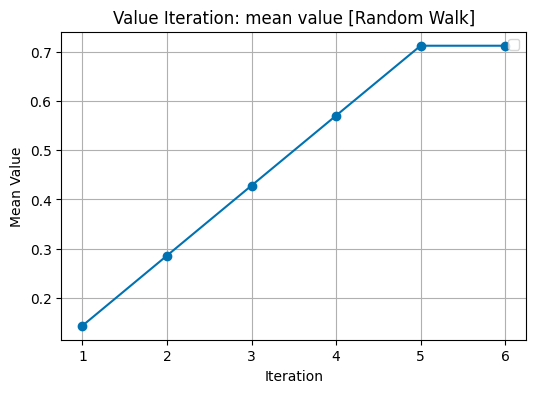

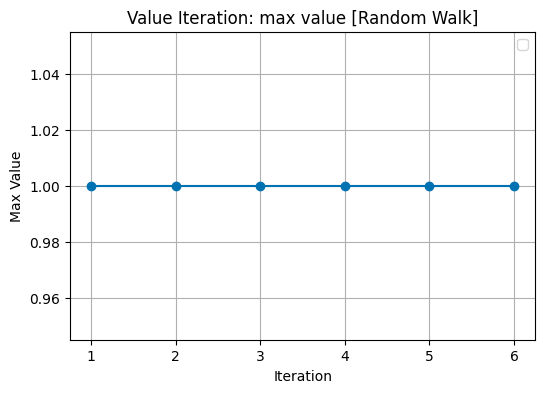

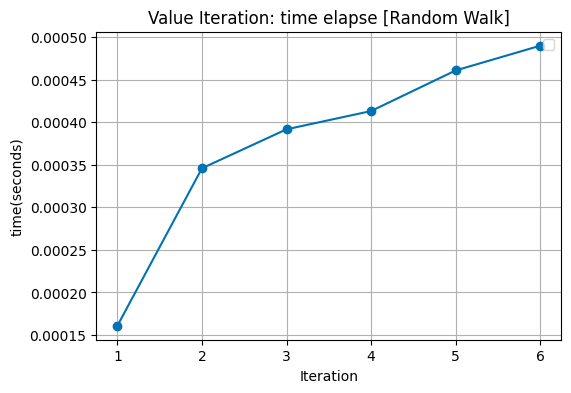

In [9]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Random Walk]", figure_size=(6,4))


P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


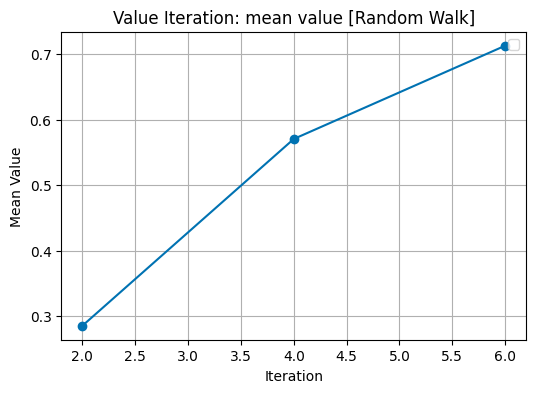

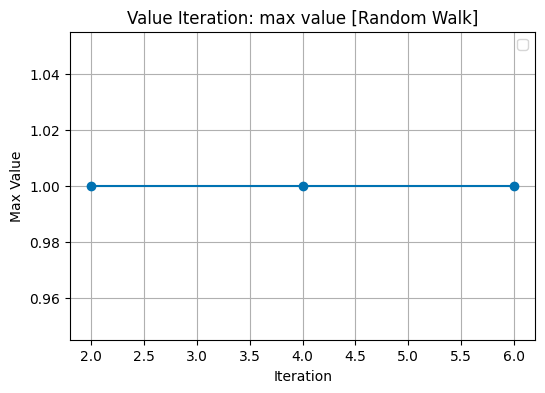

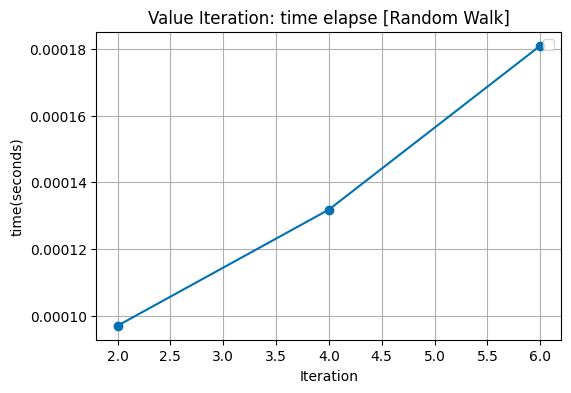

In [10]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":10**(-10), "max_iter":10**5, "skip_check":True}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Random Walk]", figure_size=(6,4))


In [11]:
pi.run_stats

[{'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.0,
  'Time': 0.00021505355834960938,
  'V[0]': 0.0,
  'Max V': 1.0,
  'Mean V': 0.14285714285714285,
  'Iteration': 1,
  'Value': array([0., 0., 0., 0., 0., 1., 0.]),
  'Policy': array([0, 0, 0, 0, 0, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.0010000000000000009,
  'Time': 0.00039005279541015625,
  'V[0]': 0.0,
  'Max V': 1.0,
  'Mean V': 0.2855714285714286,
  'Iteration': 2,
  'Value': array([0.   , 0.   , 0.   , 0.   , 0.999, 1.   , 0.   ]),
  'Policy': array([0, 0, 0, 0, 1, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.001998999999999973,
  'Time': 0.0004489421844482422,
  'V[0]': 0.0,
  'Max V': 1.0,
  'Mean V': 0.428143,
  'Iteration': 3,
  'Value': array([0.      , 0.      , 0.      , 0.998001, 0.999   , 1.      ,
         0.      ]),
  'Policy': array([0, 0, 0, 1, 1, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.0029970009999999

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


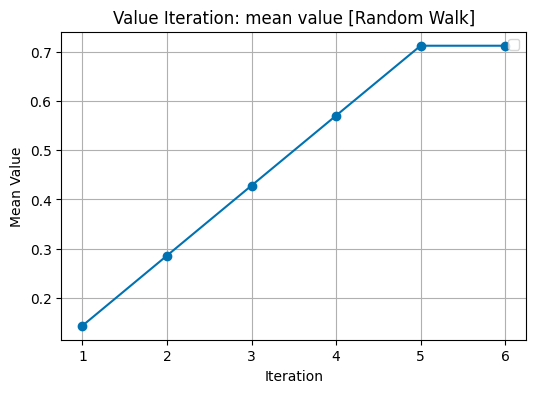

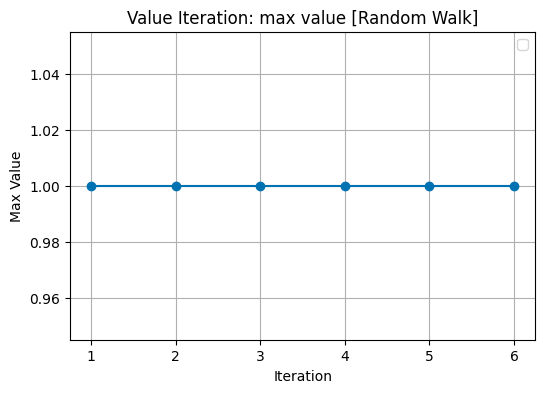

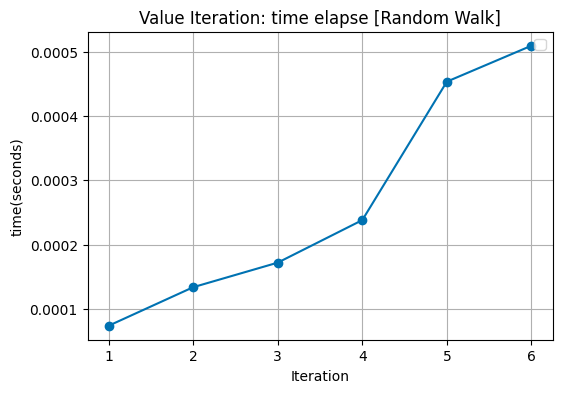

In [12]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Random Walk]", figure_size=(6,4))

In [13]:
import mdp
pi = mdp.PolicyIterationModified(P, R, 0.99999, epsilon=0.01, max_iter=10**6, skip_check=True, run_stat_frequency=1)
pi.run()
pi.policy
print("pi.policy", pi.policy)

pi.policy (0, 1, 1, 1, 1, 1, 0)


In [14]:
pi = mdp.PolicyIterationModified(P, R, 0.99999, epsilon=0.01, max_iter=10**6, skip_check=True)
pi.run()
pi.policy
print("pi.policy", pi.policy)

pi.policy (0, 1, 1, 1, 1, 1, 0)


In [15]:
vi.run_stats

[{'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 1.0,
  'Time': 7.414817810058594e-05,
  'Max V': 1.0,
  'Mean V': 0.14285714285714285,
  'Iteration': 1,
  'Value': array([0., 0., 0., 0., 0., 1., 0.]),
  'Policy': array([0, 0, 0, 0, 0, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.999,
  'Time': 0.00013399124145507812,
  'Max V': 1.0,
  'Mean V': 0.2855714285714286,
  'Iteration': 2,
  'Value': array([0.   , 0.   , 0.   , 0.   , 0.999, 1.   , 0.   ]),
  'Policy': array([0, 0, 0, 0, 1, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.998001,
  'Time': 0.00017213821411132812,
  'Max V': 1.0,
  'Mean V': 0.428143,
  'Iteration': 3,
  'Value': array([0.      , 0.      , 0.      , 0.998001, 0.999   , 1.      ,
         0.      ]),
  'Policy': array([0, 0, 0, 1, 1, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.997002999,
  'Time': 0.00023818016052246094,
  'Max V': 1.0,
  'Mean V': 0.57057199985714

In [16]:
pi

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

In [17]:
print(pi.run_stats)

[{'State': None, 'Action': None, 'Reward': 1.0, 'Error': 0.0, 'Time': 0.0002970695495605469, 'V[0]': 0.0, 'Max V': 1.0, 'Mean V': 0.14285714285714285, 'Iteration': 1, 'Value': array([0., 0., 0., 0., 0., 1., 0.]), 'Policy': array([0, 0, 0, 0, 0, 1, 0])}, {'State': None, 'Action': None, 'Reward': 1.0, 'Error': 9.99999999995449e-06, 'Time': 0.0006320476531982422, 'V[0]': 0.0, 'Max V': 1.0, 'Mean V': 0.28571285714285716, 'Iteration': 2, 'Value': array([0.     , 0.     , 0.     , 0.     , 0.99999, 1.     , 0.     ]), 'Policy': array([0, 0, 0, 0, 1, 1, 0])}, {'State': None, 'Action': None, 'Reward': 1.0, 'Error': 1.9999899999900705e-05, 'Time': 0.0009160041809082031, 'V[0]': 0.0, 'Max V': 1.0, 'Mean V': 0.4285671428714286, 'Iteration': 3, 'Value': array([0.     , 0.     , 0.     , 0.99998, 0.99999, 1.     , 0.     ]), 'Policy': array([0, 0, 0, 1, 1, 1, 0])}, {'State': None, 'Action': None, 'Reward': 1.0, 'Error': 2.9999700000837848e-05, 'Time': 0.0010249614715576172, 'V[0]': 0.0, 'Max V': 1.

In [ ]:
states = [10**s for s in range(2,4)]
discounts = compose_discounts(5)
epsilons = [0.01, 0.005, 0.001]

In [ ]:


states = [10**s for s in range(1,4)]
discounts = compose_discounts(3)
discounts = [0.999999,0.9999999]
epsilons = [0.01, 0.005, 0.001]


In [19]:
task = "Random Walk"
method = "Policy Iteration"
results = []
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    pi = mdp.PolicyIterationModified(**args)
    pi.run()

    pi_result = record(pi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    results.append(pi_result)
    num_iters = len(pi_result["Mean V"])

<AxesSubplot: >

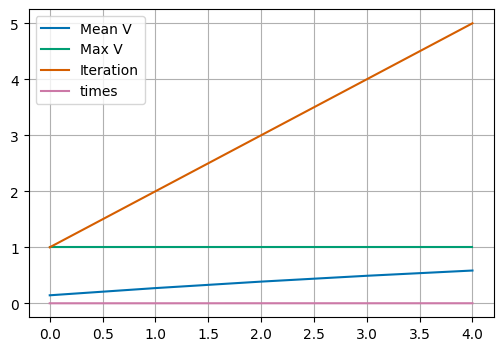

In [28]:
import pandas as pd

pd.DataFrame(record(pi.run_stats, ["Mean V", "Max V", "Iteration", "times"])).plot()

# Gamma Experiments

max mean v 0.5850142857142858


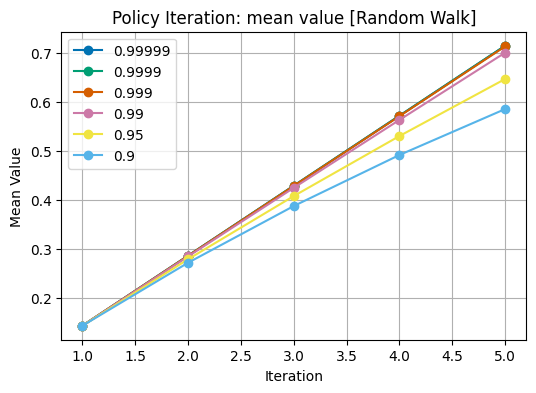

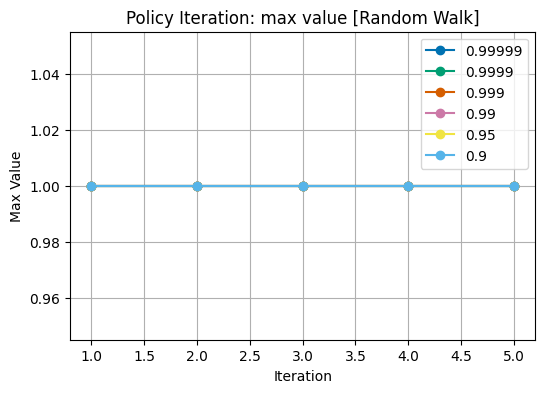

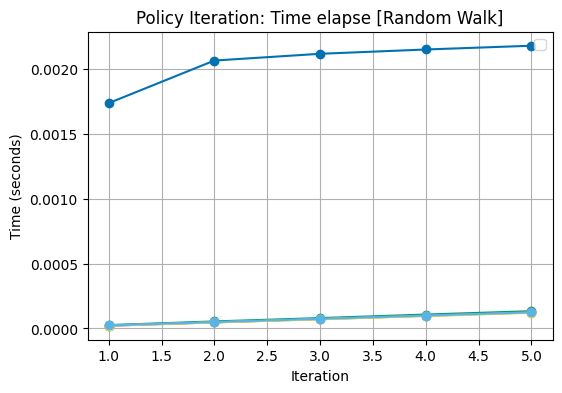

In [36]:
task = "Random Walk"
method = "Policy Iteration"
results = []
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.01, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    pi = mdp.PolicyIterationModified(**args)
    pi.run()

    pi_result = record(pi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    results.append(pi_result)
    num_iters = len(pi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))

style = "o-"
plt.ylabel("Mean Value")
plt.xlabel("Iteration")
plt.title(f"{method}: mean value [{task}]")
for i, x in enumerate(x_list):
    plt.plot(results[i]["Iteration"], results[i]["Mean V"], style)
plt.legend(x_list, loc='best')
plt.show()

plt.ylabel("Max Value")
plt.xlabel("Iteration")
plt.title(f"{method}: max value [{task}]")
for i, x in enumerate(x_list):
    plt.plot(results[i]["Iteration"], results[i]["Max V"], style)
plt.legend(x_list, loc='best')
plt.show()

plt.ylabel("Time (seconds)")
plt.xlabel("Iteration")
plt.title(f"{method}: Time elapse [{task}]")
plt.legend(x_list, loc='best')
for i, x in enumerate(x_list):
    plt.plot(results[i]["Iteration"], results[i]["times"], style)
plt.show()

In [40]:
style = "o-"

def magic_plot(results, task, method, style, x_list):
    fig, axs = plt.subplots(1 , 3,figsize=(18, 4), constrained_layout=True,)
    for i, x in enumerate(x_list):
        axs[0].plot(results[i]["Iteration"], results[i]["Mean V"], style)
    axs[0].set_ylabel("Mean Value")
    axs[0].set_xlabel("Iteration")
    axs[0].legend(x_list, loc='best')
    axs[0].set_title(f"{method}: max value [{task}]")

    for i, x in enumerate(x_list):
        axs[1].plot(results[i]["Iteration"], results[i]["Max V"], style)
    axs[1].set_ylabel("Max Value")
    axs[1].set_xlabel("Iteration")
    axs[1].legend(x_list, loc='best')
    axs[1].set_title(f"{method}: mean value [{task}]")

    for i, x in enumerate(x_list):
        axs[2].plot(results[i]["Iteration"], results[i]["times"], style)
    axs[2].set_ylabel("Time (seconds)")
    axs[2].set_xlabel("Iteration")
    axs[2].legend(x_list, loc='best')
    axs[2].set_title(f"{method}: Time elapse [{task}]")



max mean v 0.5850142857142858


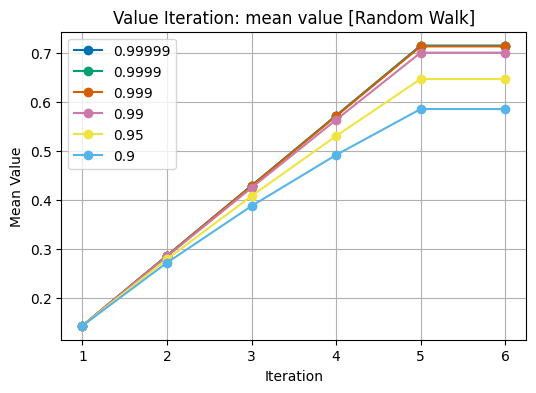

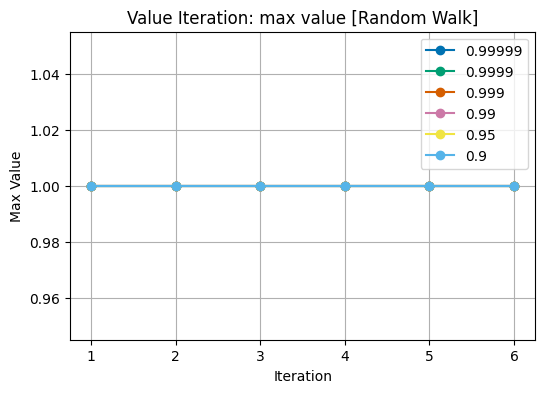

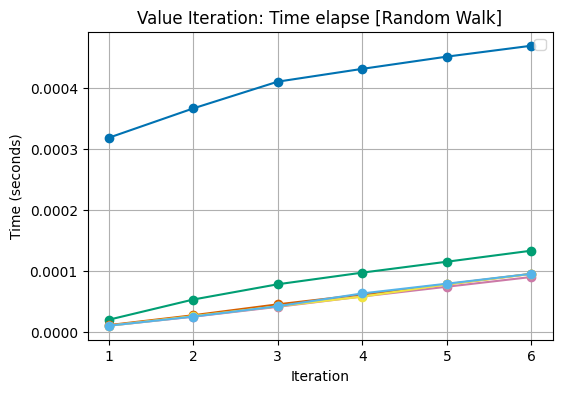

In [37]:
task = "Random Walk"
method = "Value Iteration"
results = []
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.01, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    vi = mdp.ValueIteration(**args)
    vi.run()

    vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    results.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
# plot_data([x["Iteration"] for x in results], [x["Mean V"] for x in results],
#     "Iteration", "Mean Value", f"{method}: mean value [{task}]", figure_size=(6,4), legend=x_list, style = "o-")
# plot_data([x["Iteration"] for x in results], [x["Max V"] for x in results], 
#     "Iteration", "Max Value", f"{method}: max value [{task}]", figure_size=(6,4), legend=x_list, style = "o-")
# plot_data([x["Iteration"] for x in results], [x["times"] for x in results], 
#     "Iteration", "time(seconds)", f"{method}: time elapse [{task}]", figure_size=(6,4), legend=x_list, style = "o-")

style = "o-"
plt.ylabel("Mean Value")
plt.xlabel("Iteration")
plt.title(f"{method}: mean value [{task}]")
for i, x in enumerate(x_list):
    plt.plot(results[i]["Iteration"], results[i]["Mean V"], style)
plt.legend(x_list, loc='best')
plt.show()

plt.ylabel("Max Value")
plt.xlabel("Iteration")
plt.title(f"{method}: max value [{task}]")
for i, x in enumerate(x_list):
    plt.plot(results[i]["Iteration"], results[i]["Max V"], style)
plt.legend(x_list, loc='best')
plt.show()

plt.ylabel("Time (seconds)")
plt.xlabel("Iteration")
plt.title(f"{method}: Time elapse [{task}]")
plt.legend(x_list, loc='best')
for i, x in enumerate(x_list):
    plt.plot(results[i]["Iteration"], results[i]["times"], style)
plt.show()

max mean v 0.5850142857142858


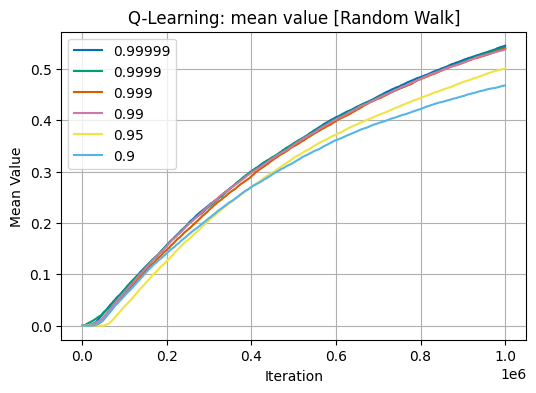

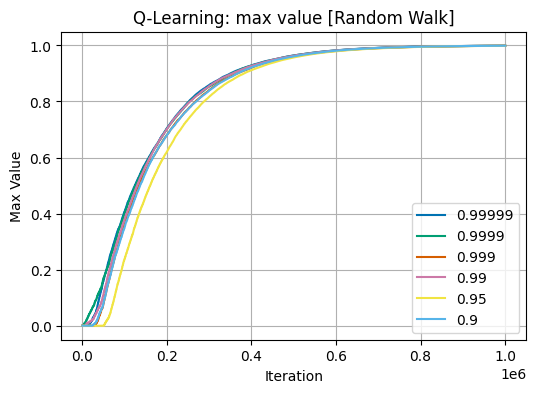

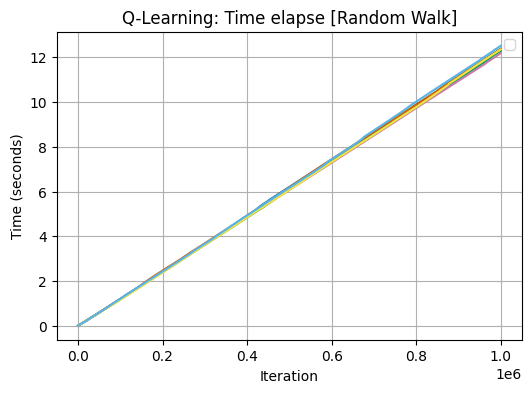

In [38]:
task = "Random Walk"
method = "Q-Learning"
results = []
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.01, "n_iter":10**6, "skip_check":True}
    q = mdp.QLearning(**args)
    q.run()

    vi_result = record(q.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    results.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
# plot_data([x["Iteration"] for x in results], [x["Mean V"] for x in results],
#     "Iteration", "Mean Value", f"{method}: mean value [{task}]", figure_size=(6,4), legend=x_list, style = "o-")
# plot_data([x["Iteration"] for x in results], [x["Max V"] for x in results], 
#     "Iteration", "Max Value", f"{method}: max value [{task}]", figure_size=(6,4), legend=x_list, style = "o-")
# plot_data([x["Iteration"] for x in results], [x["times"] for x in results], 
#     "Iteration", "time(seconds)", f"{method}: time elapse [{task}]", figure_size=(6,4), legend=x_list, style = "o-")

style = "-"
plt.ylabel("Mean Value")
plt.xlabel("Iteration")
plt.title(f"{method}: mean value [{task}]")
for i, x in enumerate(x_list):
    plt.plot(results[i]["Iteration"], results[i]["Mean V"], style)
plt.legend(x_list, loc='best')
plt.show()

plt.ylabel("Max Value")
plt.xlabel("Iteration")
plt.title(f"{method}: max value [{task}]")
for i, x in enumerate(x_list):
    plt.plot(results[i]["Iteration"], results[i]["Max V"], style)
plt.legend(x_list, loc='best')
plt.show()

plt.ylabel("Time (seconds)")
plt.xlabel("Iteration")
plt.title(f"{method}: Time elapse [{task}]")
plt.legend(x_list, loc='best')
for i, x in enumerate(x_list):
    plt.plot(results[i]["Iteration"], results[i]["times"], style)
plt.show()

# Epsilon Experiment